<a href="https://colab.research.google.com/github/Carol-ACDR/Atividades-de-Minera-o-de-Dados/blob/main/Predi%C3%A7%C3%A3o%20do%20Uso%20de%20Bicicletas%20com%20Redes%20Neurais%20MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://www.ifpb.edu.br/prpipg/pasta-imagens-da-prpipg/logoifpb.png" alt="Logo IFPB" width="10%">

**INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DA PARAÍBA
CAMPUS CAMPINA GRANDE**

**Curso:** Engenharia de Computação

**Disciplina:** Mineração de Dados

**Semestre:** 2024.2

**Professor:** Igor Barbosa da Costa

**Equipe:** Ana Carolina Dutra Ramos


# OBTENÇÃO DE DADOS

Tornando a saída deste notebook estável em diferentes execuções:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


np.random.seed(42)

Após baixar os arquivos no site: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset e traze-los ao Colab, fazendo upload dos arquivos na pasta de arquivos a direita(ou o código abaixo para fazer upload dinâmico), onde o código támbem se encontra:

In [ ]:
from google.colab import files

# Fazer upload de um ou mais arquivos
uploaded = files.upload()

Saving hour.csv to hour (2).csv


In [ ]:
# Carregar os dados de aluguel de bicicletas
bike = pd.read_csv("hour.csv")

In [ ]:
# Visualizar (primeiras linhas)
print(bike.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [ ]:
#verificar numero de linhas e colunas
bike.shape

(17379, 17)

In [ ]:
#verificar os tipos de dados de cada coluna
bike.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [ ]:
# Verificar se há valores ausentes
bike.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Estatísticas descritivas das variáveis numéricas
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


OBS1: estou usando a tabela hour.csv no lugar de day.csv pois a primeira possui a variável extra yr.

OBS2: Essas informações abaixo estão disponiveis no site, e estão sendo trazidas aqui para gerar mais clareza.

* instant: índice do registro
* dteday: data
* season: estação do ano (1: inverno, 2: primavera, 3: verão, 4: outono)
* yr: ano (0: 2011, 1: 2012)
* mnth: mês (1 a 12)
* hr: hora (0 a 23) (presente apenas em hour.csv)
* holiday: indica se o dia é feriado ou não (extraído de DCHR).
* weekday: dia da semana
* workingday: indica se o dia é um dia útil (1) ou não (0) (considerando que um dia útil não é nem fim de semana nem feriado).
* weathersit (condição climática):

1: Céu limpo, poucas nuvens, parcialmente nublado

2: Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Poucas nuvens, Névoa

3: Neve leve, Chuva leve + Trovoada + Nuvens dispersas, Chuva leve + Nuvens dispersas

4: Chuva forte + Granizo + Trovoada + Névoa, Neve + Nevoeiro

* Variáveis Normalizadas:

temp: Temperatura normalizada em Celsius, calculada como (t - t_min) / (t_max - t_min), com t_min = -8°C e t_max = 39°C (apenas na escala horária).

atemp: Sensação térmica normalizada em Celsius, com t_min = -16°C e t_max = 50°C (apenas na escala horária).

hum: Umidade relativa normalizada, com valores divididos por 100 (máximo).

windspeed: Velocidade do vento normalizada, com valores divididos por 67 (máximo).

Contagem de Usuários:

casual: Número de usuários eventuais

registered: Número de usuários registrados

cnt: Contagem total de bicicletas alugadas (soma de usuários eventuais e registrados).

Definição de tamanhos de fonte padrão para criar figuras visualmente agradáveis:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Observação da distribuição inicial das variaveis relacionadas a variavel alvo ( Contagem total de bicicletas alugadas)

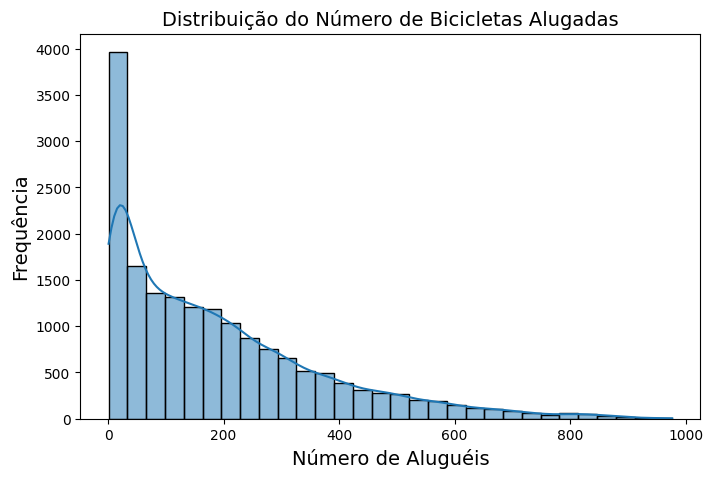

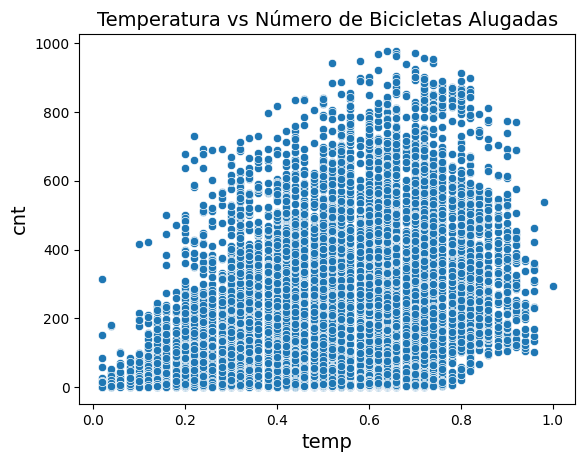

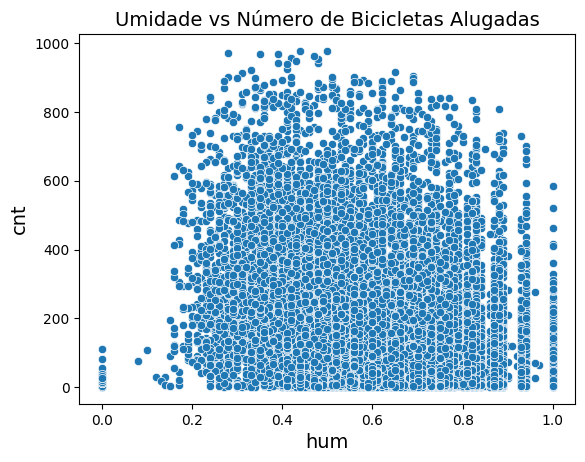

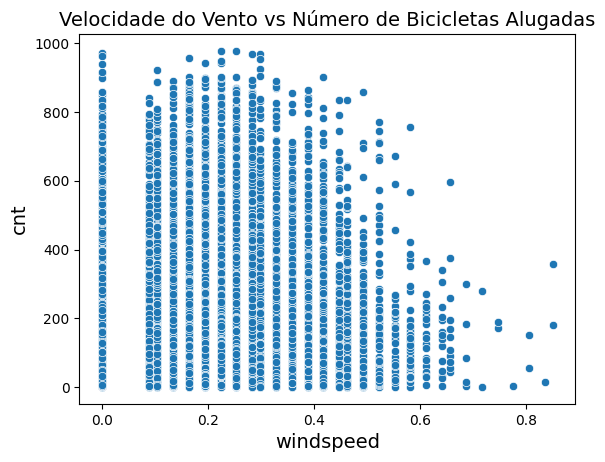

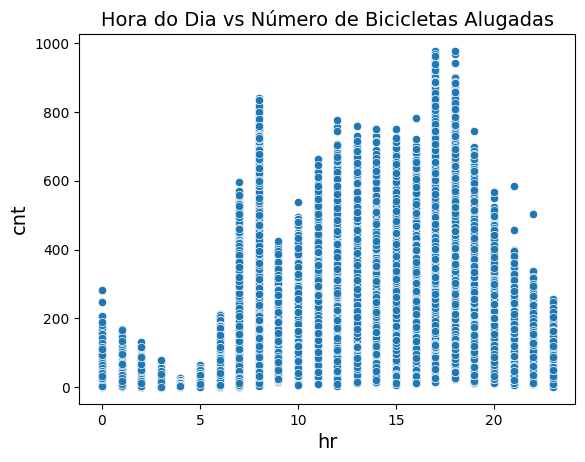

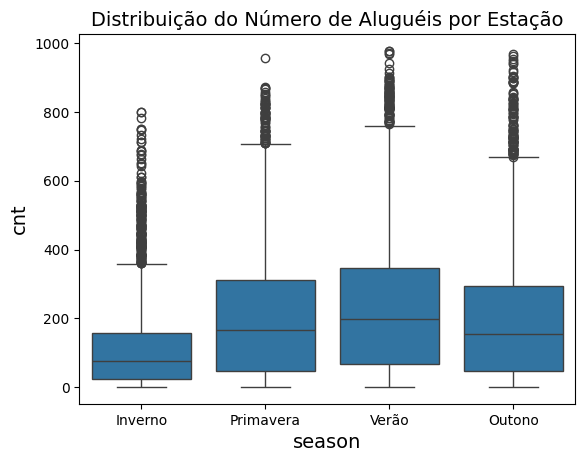

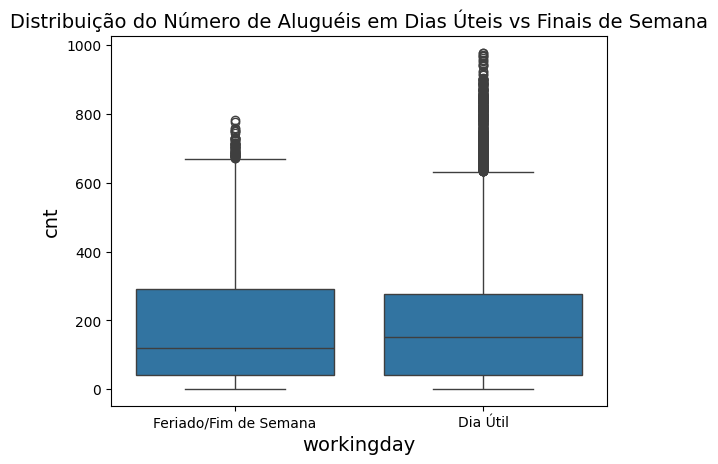

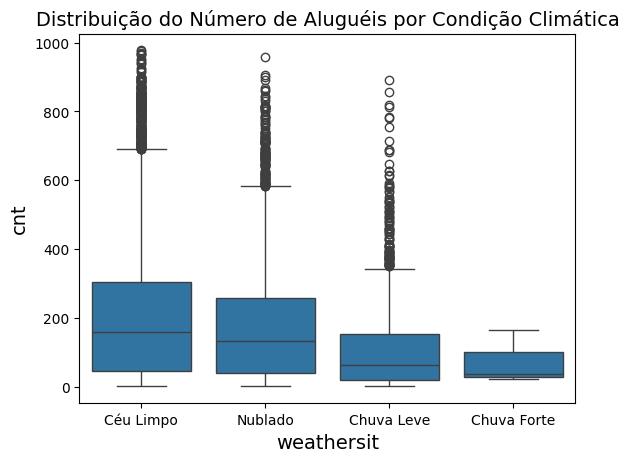

In [ ]:

# Histograma de Contagem total de bicicletas alugadas (analizar distribuição de variavel contínua)
plt.figure(figsize=(8,5))
sns.histplot(bike['cnt'], bins=30, kde=True)
plt.title('Distribuição do Número de Bicicletas Alugadas')
plt.xlabel('Número de Aluguéis')
plt.ylabel('Frequência')
plt.show()

#scatterplot para comparar variaveis numericas aparentemente relevantes

# Relação entre temperatura e número de aluguéis
sns.scatterplot(x='temp', y='cnt', data=bike)
plt.title('Temperatura vs Número de Bicicletas Alugadas')
plt.show()

# Relação entre umidade e número de aluguéis
sns.scatterplot(x='hum', y='cnt', data=bike)
plt.title('Umidade vs Número de Bicicletas Alugadas')
plt.show()

# Relação entre velocidade do vento e número de aluguéis
sns.scatterplot(x='windspeed', y='cnt', data=bike)
plt.title('Velocidade do Vento vs Número de Bicicletas Alugadas')
plt.show()

# Relação entre hora do dia e número de aluguéis
sns.scatterplot(x='hr', y='cnt', data=bike)
plt.title('Hora do Dia vs Número de Bicicletas Alugadas')
plt.show()


# Boxplot para comparar variaveis categoricas aparentemente relevantes

# Comparação do aluguel de bicicletas por estação do ano
sns.boxplot(x='season', y='cnt', data=bike)
plt.title('Distribuição do Número de Aluguéis por Estação')
plt.xticks(ticks=[0,1,2,3], labels=['Inverno', 'Primavera', 'Verão', 'Outono'])
plt.show()

# Comparação por tipo de dia (útil ou não)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.title('Distribuição do Número de Aluguéis em Dias Úteis vs Finais de Semana')
plt.xticks(ticks=[0,1], labels=['Feriado/Fim de Semana', 'Dia Útil'])
plt.show()

# Comparação por condição climática
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.title('Distribuição do Número de Aluguéis por Condição Climática')
plt.xticks(ticks=[0,1,2,3], labels=['Céu Limpo', 'Nublado', 'Chuva Leve', 'Chuva Forte'])
plt.show()


# LIMPEZA E PRÉ-PROCESSAMENTO

O dataset contém variáveis que logo de cara já parecem desnecessárias que devem ser removidas, mais especificamente:
* instant (que serve apenas para indicar a linha do dataset)
* dteday (que tem o dia, mes e ano em formato object. Só que já existem outras variaveis que podem dar as informações relevantes que seriam necessarias, como yr (ano), mnth (mês), weekday (dia da semana), hr (hora do dia).)
* Casual e Registered (uma vez que o  total de bicicletas alugadas é uma soma das duas, essa informação se torna menos relevante para essa variavel em especifico, já que serve mais para controle da propria loja).

 Também é preciso normalizar variáveis numéricas.

 OBS3: As variáveis categoricas já estão em formatos int, então, uma vez que se trata de uma rede neural, seu formato já está adequado.

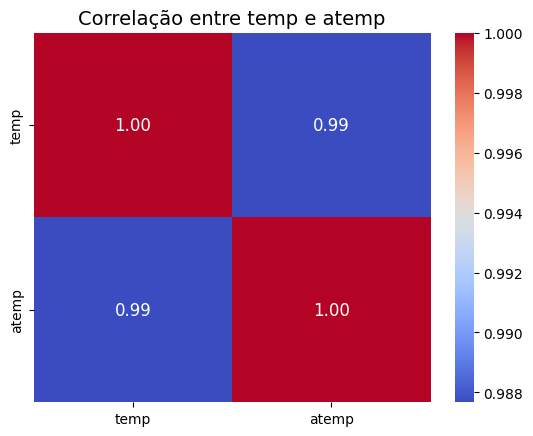

In [ ]:
#checar se atemp também é desnecessaria
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a correlação entre temp e atemp
corr = bike[['temp', 'atemp']].corr()

# Exibir a matriz de correlação
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre temp e atemp")
plt.show()


Com uma correlação de 0.99, as duas informações estão altamente correlacionadas, então, para evitar redundancia no modelo, ela será removida.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

# Remover colunas irrelevantes
bike = bike.drop(columns=["instant", "dteday", "casual", "registered", "atemp"])

# Separar variáveis preditoras e alvo
X = bike.drop(columns=["cnt"])  # "cnt" é a variável de saída
y = bike["cnt"]

# Normalizar variáveis numéricas
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Divisão padronizada (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Salvar conjunto de teste para garantir consistência
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df.to_csv("bike_test_features.csv", index=False)
y_test.to_csv("bike_test_target.csv", index=False)


# Construção da Rede Neural MLP

Abaixo está a contrução da rede neural MLP para regressão

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
# Criar modelo MLP

modelo = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normaliza a ativação da camada anterior
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    Dense(1)
])
# Compilar modelo
modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Treinamento do Modelo

In [ ]:
# Treinar o modelo
historico = modelo.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=64)


Epoch 1/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2866.0488 - mae: 37.6484 - val_loss: 2624.2751 - val_mae: 32.4000
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3123.1477 - mae: 38.0692 - val_loss: 2741.8816 - val_mae: 33.5695
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2940.1963 - mae: 37.6471 - val_loss: 2228.8887 - val_mae: 30.8545
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2574.6575 - mae: 35.0010 - val_loss: 2311.1670 - val_mae: 30.5673
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2813.2278 - mae: 37.4522 - val_loss: 2651.8352 - val_mae: 32.7880
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2747.6907 - mae: 36.4671 - val_loss: 2360.6997 - val_mae: 31.5667
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2608.4248 - mae: 35.3697 - val_loss: 2595.1274 - val_mae: 32.4202
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2864.2161 - mae: 37.3187 - val_loss: 2225.5195 - v

#Avaliação no Conjunto de Teste

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fazer previsões
y_pred = modelo.predict(X_test).flatten()

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Exibir resultados
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Erro Médio Absoluto (MAE): 25.97
Erro Quadrático Médio (MSE): 1676.72
Raiz do Erro Quadrático Médio (RMSE): 40.95
Coeficiente de Determinação (R²): 0.95
